# Make mesh for ALM test

In [1]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Important header information
naluhelperdir = '/projects/wind_uq/lcheung/naluhelperscripts'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager
sys.path.insert(1, naluhelperdir)
import plotmesh

# Colors for refinement levels
colors=['b','c','y','g','r', 'lightblue', 'lightcyan', 'lightyellow', 'lightgreen', 'lightred']
plotmesh.meshcolors=colors

%matplotlib inline

In [2]:
rotorD = 126

# From static_box.txt
boxestxt="""
8
1
-192.0 -140.8 -140.8 1536.0 140.8 140.8
1
-128.0 -128.0 -128.0 1280.0 128.0 128.0
1
-96.0 -96.0 -96.0 1024 96.0 96.0
1
-64.0 -83.2 -83.2 400.0 83.2 83.2
1
-38.4 -76.8 -76.8 200.4 76.8 76.8
1
-12.8 -71.68 -71.68 120.8 71.68 71.68
1
-6.4 -67.84 -67.84 60.4 67.84 67.84
1
-3.84 -65.28 -65.28 3.84 65.28 65.28
"""
boxes=boxestxt.split('\n')
boxes = []
for x in boxestxt.split('\n'):
    if len(x.split())>1:
        boxes.append([float(y)/rotorD for y in x.split()])
for level, x in enumerate(boxes): 
    dx = 64.0/2**(level+1)
    boxspec = ['{0:0.2f}'.format(i) for i in x]
    print("%0.3f %s"%(dx, repr(boxspec)))

32.000 ['-1.52', '-1.12', '-1.12', '12.19', '1.12', '1.12']
16.000 ['-1.02', '-1.02', '-1.02', '10.16', '1.02', '1.02']
8.000 ['-0.76', '-0.76', '-0.76', '8.13', '0.76', '0.76']
4.000 ['-0.51', '-0.66', '-0.66', '3.17', '0.66', '0.66']
2.000 ['-0.30', '-0.61', '-0.61', '1.59', '0.61', '0.61']
1.000 ['-0.10', '-0.57', '-0.57', '0.96', '0.57', '0.57']
0.500 ['-0.05', '-0.54', '-0.54', '0.48', '0.54', '0.54']
0.250 ['-0.03', '-0.52', '-0.52', '0.03', '0.52', '0.52']


In [3]:
# Put the input yaml file here:
nalusetup = """
nalu_abl_mesh:
  output_db: mesh_abl.exo
  spec_type: bounding_box
  fluid_part_name: fluid_part
  vertices:
  - [-1024.0, -1024.0, -1024.0]
  - [1024.0, 1024.0, 1024.0] 

  mesh_dimensions: [128, 128, 128] 
  xmin_boundary_name: west
  xmax_boundary_name: east
  ymin_boundary_name: south
  ymax_boundary_name: north
  zmin_boundary_name: lower
  zmax_boundary_name: upper

# Mandatory section for Nalu preprocessing
nalu_preprocess:
  # Name of the input exodus database
  input_db: mesh_abl.exo
  # Name of the output exodus database
  output_db: refinedmesh.exo

  # Nalu preprocessor expects a list of tasks to be performed on the mesh and
  # field data structures
  tasks:
    - mesh_local_refinement

  mesh_local_refinement:
    fluid_parts: [fluid_part]
    write_percept_files: true
    percept_file_prefix: adapt
    search_tolerance: 11.0

    turbine_locations:
      - [ 5.0191, 0.0, -90.0 ]

    turbine_diameters: 126          # Provide a list for variable diameters
    turbine_heights: 90             # Provide a list for variable tower heights
    orientation:
      type: wind_direction
      wind_direction:  270.0 
    refinement_levels:  
    # Upstream, downstream, lateral, and vertical heights in turbine D
#      - [1.50, 8.00, 1.30, 1.30 ]        # 32m
#      - [1.00, 7.00, 1.10, 1.10 ]        # 16m
      - [0.75, 6.00, 1.00, 1.00 ]        #  8m
      - [0.50, 3.20, 0.90, 0.90 ]        #  4m
      - [0.40, 1.60, 0.80, 0.80 ]        #  2m
      - [0.30, 1.00, 0.70, 0.70 ]        #  1m
      - [0.10, 0.50, 0.60, 0.60 ]        #  0.50m
      - [0.03, 0.03, 0.52, 0.52 ]        #  0.25m
"""

level      Min est      Max est  cell size
    0      2097152      2097152  [16.0, 16.0, 16.0]
    1      2187093      2300884  [8.0, 8.0, 8.0]
    2      2505397      3028436  [4.0, 4.0, 4.0]
    3      3607897      5548436  [2.0, 2.0, 2.0]
    4      8029721     15646612  [1.0, 1.0, 1.0]
    5     20091450     43190220  [0.5, 0.5, 0.5]
    6     27299070     59664780  [0.25, 0.25, 0.25]
Estimated mesh size (min): 27,299,070
Estimated mesh size (max): 59,664,780


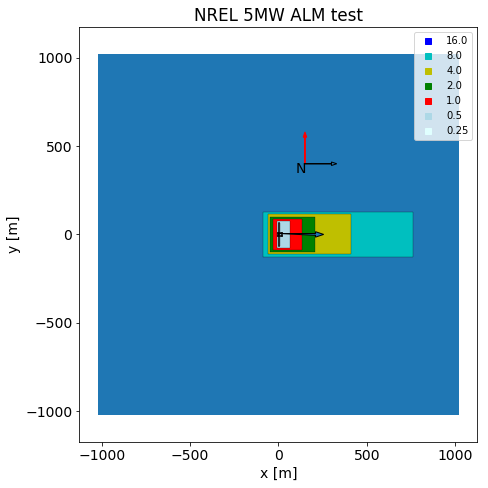

In [4]:
plt.figure(figsize=(7,7));
#fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False);
plt.rc('font', size=14)
#plt.rcParams["font.family"] = "DejaVu Serif" #"Nimbus Roman"

norththeta = (295.8-270.0)*np.pi/180.0
northvec   = [-np.sin(norththeta), np.cos(norththeta)]

myraNorth  = [0, 1, 0]
myraEast   = [1, 0, 0]

yamldata = plotmesh.getyamlfromstring(nalusetup)
turbineXY, turbineD, turbineHH, orienttype, winddir, refineboxes = plotmesh.getPreprocess(yamldata)
plotmesh.plotmeshes(yamldata, turbineXY, turbineD, winddir, refineboxes, windarrowcenter=turbineXY[0])
plt.axis('equal');
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NREL 5MW ALM test')

# Put north on here
#plt.annotate("N", xy=(100+200*northvec[0],100+200*northvec[1]), 
#             xytext=(150.0, 100.0), ha="center",arrowprops=dict(arrowstyle="->"))
plt.arrow(150, 400, 150*myraNorth[0], 150*myraNorth[1], head_width=20, color='r')
plt.arrow(150, 400, 150*myraEast[0], 150*myraEast[1], head_width=20)
plt.text(100,350, "N")
#plt.annotate("", xy=(150+200*myraEast[0],400+200*myraEast[1]), 
#             xytext=(150.0, 400.0), ha="center",arrowprops=dict(arrowstyle="->"))

# Get the mesh size
sizelevelsmin = plotmesh.estimateMeshSize(yamldata, turbineXY, turbineD, winddir, refineboxes, weights=[1,1])
sizelevelsmax = plotmesh.estimateMeshSize(yamldata, turbineXY, turbineD, winddir, refineboxes, weights=[0,2])

print("%5s %12s %12s  cell size"%("level","Min est","Max est"))
for i, level in enumerate(sizelevelsmin): 
    print("%5i %12i %12i  "%(i, sizelevelsmin[i][0], sizelevelsmax[i][0])+repr(sizelevelsmin[i][1]))
     
print("Estimated mesh size (min): "+'{:,}'.format(sizelevelsmin[-1][0]))
print("Estimated mesh size (max): "+'{:,}'.format(sizelevelsmax[-1][0]))

# Make a legend
# --- just make a legend ---
legend_el = []
for i, level in enumerate(sizelevelsmin):    
    legend_el.append(Line2D([0],[0], linewidth=0, marker='s',color=colors[i], label=level[1][0]))
plt.legend(handles=legend_el, fontsize=10, frameon=True)
plt.tight_layout()

In [5]:
# Write the yaml file to string
text_file = open("createmesh.yaml", "w")
n = text_file.write(nalusetup)
text_file.close()

To create the mesh with percept and mesh-adapt, run
```bash
$ ./buildrefinemesh.sh -n 128 createmesh.yaml |tee createmesh.log
```